In [1]:
#Covid-19 Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read CSV files
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [3]:
# Droping Unrelevant feature (Sno)
df=df.drop('Sno', axis=1)
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0


In [4]:
# Droping Unrelevanet feature (State/UnionTerritory)
df=df.drop('State/UnionTerritory', axis=1)
df.head(20)

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,1,0,0,0
1,31/01/20,1,0,0,0
2,01/02/20,2,0,0,0
3,02/02/20,3,0,0,0
4,03/02/20,3,0,0,0
5,04/02/20,3,0,0,0
6,05/02/20,3,0,0,0
7,06/02/20,3,0,0,0
8,07/02/20,3,0,0,0
9,08/02/20,3,0,0,0


In [5]:
# Grouping all the feature by Date
df=df.groupby('Date', sort=False).sum()
df.head(20)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0
04/02/20,3,0,0,0
05/02/20,3,0,0,0
06/02/20,3,0,0,0
07/02/20,3,0,0,0


In [6]:
# Total Cases on Each Day (Add Tota_Cases Column)
df['Total_cases']=df.sum(axis=1).astype('int')
df.head(20)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


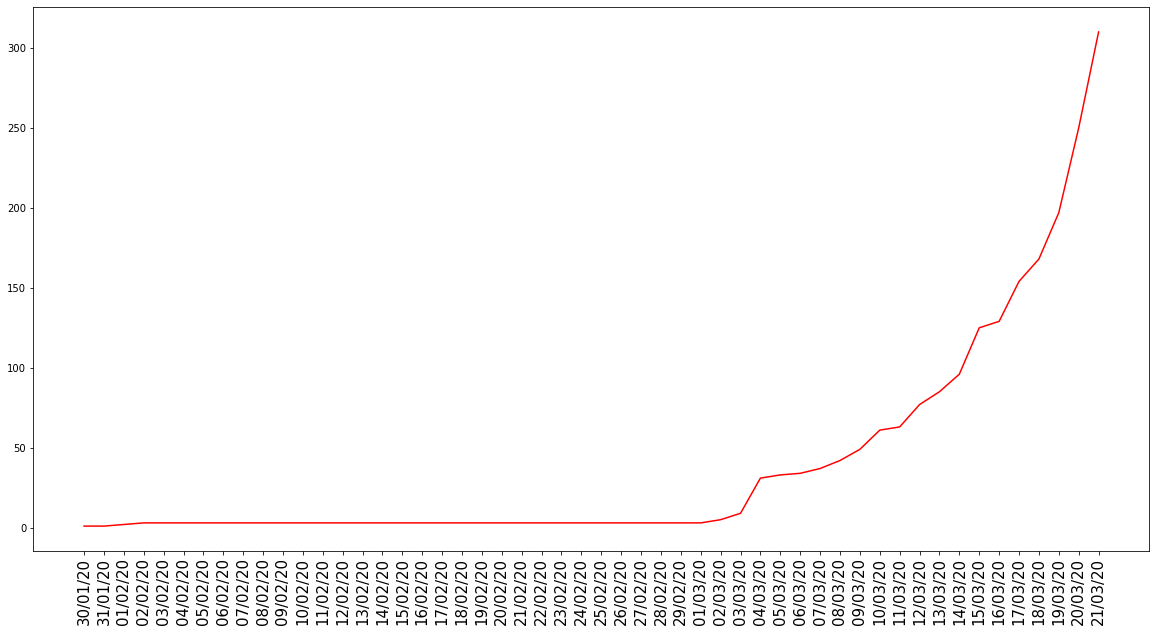

In [7]:
# Visualization of Total number of cases
plt.figure(figsize=(20,10))
plt.plot(df.Total_cases, color='r')
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [10]:
# Rate of increase on each day
rate=[]
for i in range(0,df.shape[0]-1):
    ratenum=(df['Total_cases'].iloc[i+1]-df['Total_cases'].iloc[i])/df['Total_cases'].iloc[i]
    rate.append(ratenum)

In [11]:
import numpy as np
avg_rate=np.average(rate)
avg_rate

0.15548289717820452

In [13]:
# Exponential Model
# P_t= P_o*(e^(r*t))
import math
P_o=31
t=26
P_t=round(P_o*(math.exp(avg_rate*t)))
P_t

1766